In [1]:
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv("C:/Users/DELL/Desktop/research.csv")


#Visualize 
data.shape

(1049, 14)

In [3]:
data.describe()

,Patient no,Age,Gender,Substance,Melanch,Status,Work,afftype,Madrs1,Madrs2,Genetics,Sleep disorders,Inpatient,Stage
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.00000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,525.000000,21.491897,0.514776,1.958055,1.496663,1.481411,1.477598,2.014299,29.71592,30.242135,0.523356,2.009533,1.511916,1.937083
std,302.964519,5.291880,0.500020,0.820860,0.500227,0.499893,0.499736,0.801231,17.89066,17.372065,0.499692,0.804273,0.500096,0.813676
min,1.000000,13.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,263.000000,17.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.00000,15.000000,0.000000,1.000000,1.000000,1.000000
50%,525.000000,21.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,30.00000,30.000000,1.000000,2.000000,2.000000,2.000000
75%,787.000000,26.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,45.00000,45.000000,1.000000,3.000000,2.000000,3.000000
max,1049.000000,30.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,60.00000,60.000000,1.000000,3.000000,2.000000,3.000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [6]:
X_train, X_test = train_test_split(data, test_size=.33)

Y_train=X_train["Stage"]
X_train = X_train.drop('Stage', axis=1)
Y_test=X_test["Stage"]
X_test = X_test.drop('Stage', axis=1)
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_test.shape

C:\Users\DELL\Downloads\anacondaeve\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(347,)

In [7]:
Y_pred_1 = logreg.predict(X_test)
acc_log = logreg.score(X_train,Y_train) * 100
acc_log

38.17663817663818

In [8]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_2 = svc.predict(X_test)
acc_linear_svc = svc.score(X_train,Y_train) * 100
# acc_svc

In [9]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, Y_train)
Y_pred_3 = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train) * 100
acc_knn

100.0

In [10]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_4 = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train) * 100
acc_decision_tree

100.0

In [11]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train,Y_train)
Y_pred_5= random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_train,Y_train) * 100
acc_random_forest

100.0

In [12]:
from sklearn.linear_model import Perceptron
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [13]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [14]:
X=data.values
X = scale(X)
pca = PCA(n_components=4)

In [15]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\DELL\Downloads\anacondaeve\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [16]:
results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 'Perceptron','Stochastic Gradient Decent','Decision Tree'],'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron,acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
100.000000,KNN
100.000000,Random Forest
100.000000,Decision Tree
39.030000,Naive Bayes
38.888889,Support Vector Machines
38.176638,Logistic Regression
37.180000,Perceptron
30.200000,Stochastic Gradient Decent


In [17]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.33333333 0.36170213 0.27857143 0.37142857 0.37142857]
Mean: 0.34329280648429583
Standard Deviation: 0.03524256945376868


In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head

<bound method NDFrame.head of                  importance
feature                    
Patient no            0.175
Madrs1                0.160
Madrs2                0.157
Age                   0.136
Sleep disorders       0.058
Substance             0.057
afftype               0.056
Genetics              0.038
Inpatient             0.036
Work                  0.033
Gender                0.032
Melanch               0.031
Status                0.030>

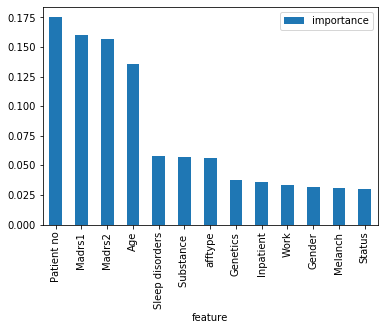

In [19]:
importances.plot.bar()

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred, pos_label=1, average='binary')
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

NameError: name 'y_test' is not defined